### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/DATA/CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Exploratory Data Analysis

In [4]:
print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


In [6]:
print(df.describe())

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


### Handle Missing Values

In [7]:
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

### Convert Categorical Variables to Dummy Variables

In [8]:
df = pd.get_dummies(df, drop_first=True)

In [9]:
print(df.columns)

Index(['year', 'selling_price', 'km_driven',
       'name_Ambassador Classic 2000 Dsz',
       'name_Ambassador Grand 1800 ISZ MPFI PW CL', 'name_Audi A4 1.8 TFSI',
       'name_Audi A4 2.0 TDI', 'name_Audi A4 2.0 TDI 177 Bhp Premium Plus',
       'name_Audi A4 3.0 TDI Quattro', 'name_Audi A4 30 TFSI Technology',
       ...
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object', length=1504)


In [10]:
df['car_age'] = 2025 - df['year']
df.drop('year', axis=1, inplace=True)


### Outlier Detection

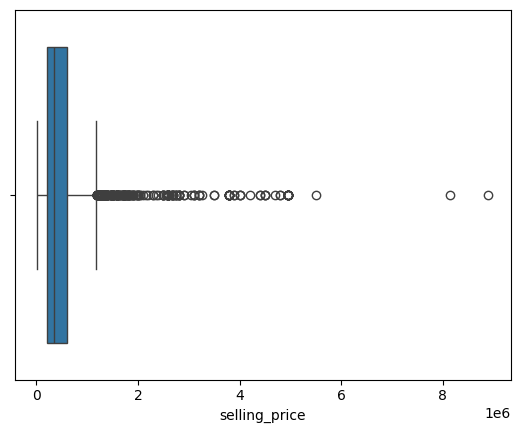

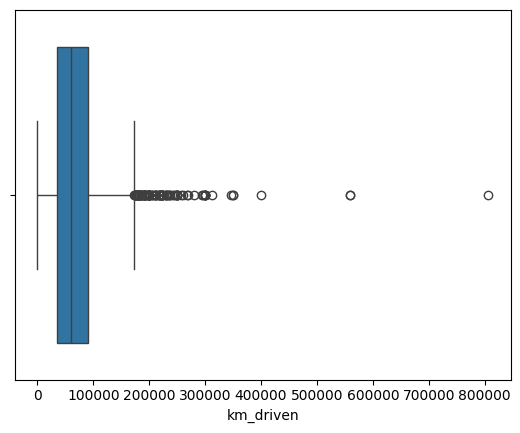

In [11]:
sns.boxplot(x=df['selling_price'])
plt.show()
sns.boxplot(x=df['km_driven'])
plt.show()

In [12]:
df = df[df['selling_price'] < df['selling_price'].quantile(0.99)]
df = df[df['km_driven'] < df['km_driven'].quantile(0.99)]

### Correlation Analysis

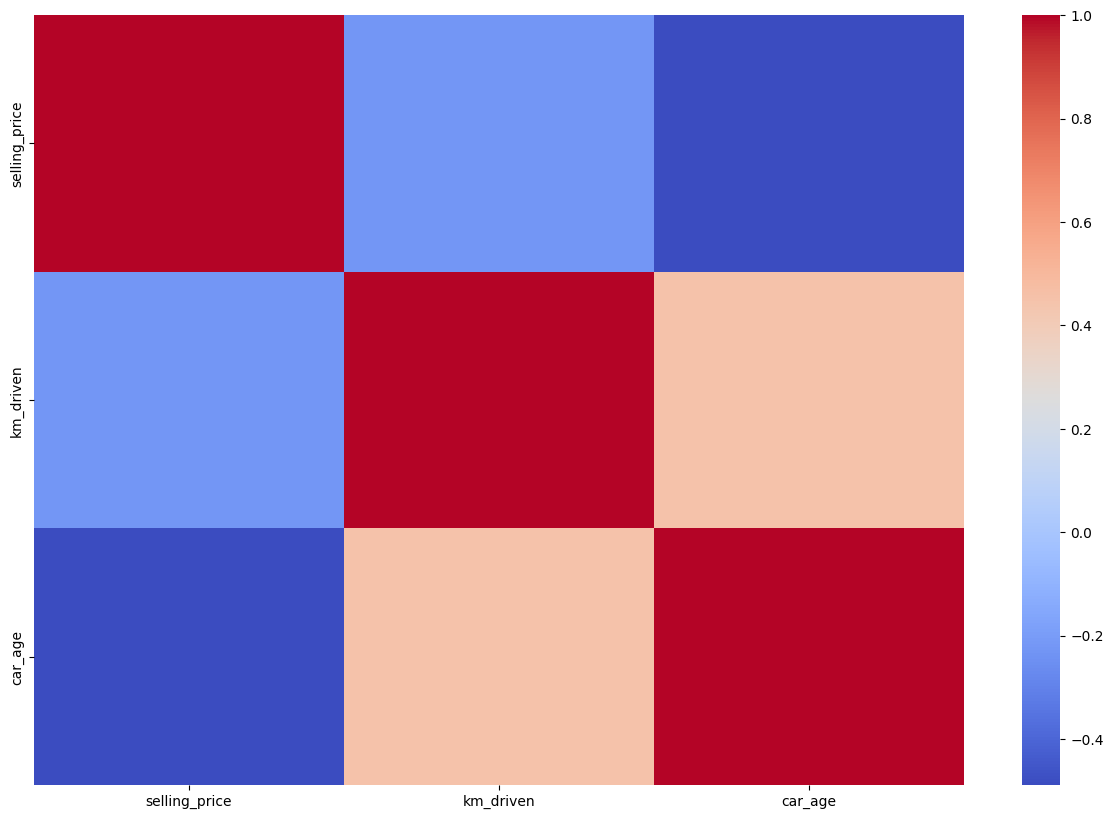

In [13]:
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', cbar=True)
plt.show()

### Train-Test Split

In [14]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [16]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 42294589015.55721
R² Score: 0.7543694324039886


In [17]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                                             Coefficient
km_driven                                      -0.651118
name_Ambassador Classic 2000 Dsz            51578.554028
name_Ambassador Grand 1800 ISZ MPFI PW CL  165256.514749
name_Audi A4 1.8 TFSI                      314319.225341
name_Audi A4 2.0 TDI                       352732.923732
...                                                  ...
owner_Fourth & Above Owner                 -18336.679729
owner_Second Owner                         -17112.056536
owner_Test Drive Car                       112529.558287
owner_Third Owner                          -28120.213436
car_age                                    -24925.233931

[1503 rows x 1 columns]
